### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 2
### Due: Monday, Feb 7th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on Feb 7th.

---

## Problem 1

In the lecture you have seen how to fetch and plot quasar spectra using `fetch_sdss_spectrum` given the three parameters plate id, mjd, fiber id.

Look at the spectra of a number of quasars at different redshifts. How do the spectra change as redshift increases? 
(Hint: to get many quasars, try to vary the three parameters. The redshift $z$ is in the plot.)

Make a graph of quasar color as a function of redshift. How do you explain what you see in the graph?

How do spectra change at increasing redshift?


### Solution

In [34]:
def create_plot(plate, mjd, fiber, ylim2):
    from matplotlib import pyplot as plt
    from astroML.datasets import fetch_sdss_spectrum
    
    spec = fetch_sdss_spectrum(plate, mjd, fiber)
    
    ax = plt.axes()
    ax.plot(spec.wavelength(), spec.spectrum, '-k', label='spectrum')
    ax.plot(spec.wavelength(), spec.error, '-', color='gray', label='error')

    ax.legend(loc=4)

    ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())

    ax.text(0.05, 0.95, 'z = %.2f' % spec.z, size=16,
            ha='left', va='top', transform=ax.transAxes)

    ax.set_xlabel(r'$\lambda (\AA)$')
    ax.set_ylabel('Flux')

    ax.set_ylim(-10, ylim2)

    plt.show()

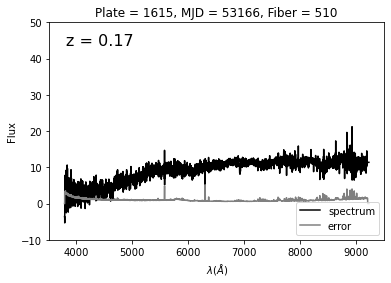

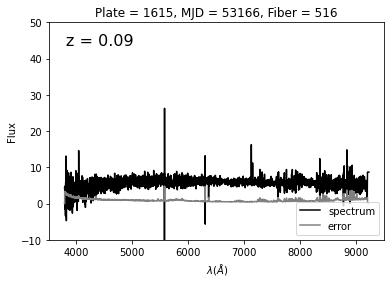

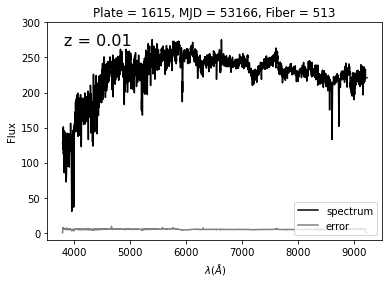

In [35]:
plate = 1615
mjd = 53166
fiber = 510

create_plot(plate, mjd, fiber, 50)

plate = 1615
mjd = 53166
fiber = 516

create_plot(plate, mjd, fiber, 50)

plate = 1615
mjd = 53166
fiber = 513

create_plot(plate, mjd, fiber, 300)

It looks like the spectra's flux decreases across the board for higher redshifts (z), but decreases less for high wavelengths, which means stars will appear more red because less of that wavelength is filtered out (?).

I was confused to plot color (wavelength) against redshift (z), but I think I've drawn the correct conclusions (?)!

## Problem 2

Scatter plots are very useful when visualizing rather sparse, small data sets. Density plots are the right tool for visualizing rather dense, large data sets. 
As many astronomical data sets have both dense and sparse regions, a combination of both is often used.

Using data obtained with `fetch_sdss_S82standards`, generate a scatter plot with contours over dense regions.

### Solution



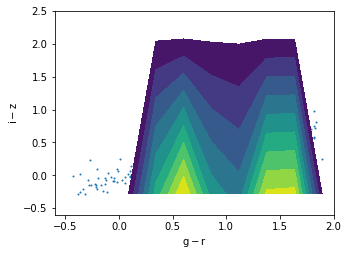

In [59]:
from matplotlib import pyplot as plt
from astroML.datasets import fetch_sdss_S82standards
from astroML.plotting import scatter_contour

# Fetch the stripe 82 data
data = fetch_sdss_S82standards()

# select the first 10000 points
data = data[:20000]

# select the mean magnitudes for g, r, i
g = data['mmu_g']
r = data['mmu_r']
i = data['mmu_i']
z = data['mmu_z']

#------------------------------------------------------------
# Plot the g-r vs r-i colors
fig, ax = plt.subplots(figsize=(5, 3.75))
scatter_contour(g-r, i-z
                , plot_args = dict(marker='.', markersize=2, linestyle='none'))

ax.set_xlim(-0.6, 2.0)
ax.set_ylim(-0.6, 2.5)

ax.set_xlabel(r'${\rm g - r}$')
ax.set_ylabel(r'${\rm i - z}$')

plt.show()